# Problem understanding 

## Predict Shipment Arrives on time or not  which is 0 and 1 , this is supervised  Binary classification problem (o/p label known)  0 n 1

### Step 1: Load ,Understand , Exploration and Data Preprocessing



In [5]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')
import pandas as pd

# Load the dataset
# r Before Path will Handle any White Spaces in the Patch 

data=pd.read_csv(r"C:\Users\suresh chitturi\Downloads\data_g8.csv")

# Display the first few rows of the dataset
data.head(), data.info(), data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10999 non-null  int64  
 1   Warehouse_block      10999 non-null  object 
 2   Mode_of_Shipment     10999 non-null  object 
 3   Customer_care_calls  10999 non-null  int64  
 4   Customer_rating      10999 non-null  int64  
 5   Cost_of_the_Product  10901 non-null  float64
 6   Prior_purchases      10999 non-null  int64  
 7   Product_importance   10845 non-null  object 
 8   Gender               10999 non-null  object 
 9   Discount_offered     10999 non-null  int64  
 10  Weight_in_gms        10860 non-null  float64
 11  Reached.on.Time_Y.N  10999 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 1.0+ MB


(   ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
 0   1               D           Flight                    4                2   
 1   2               F           Flight                    4                5   
 2   3               A           Flight                    2                2   
 3   4               B           Flight                    3                3   
 4   5               C           Flight                    2                2   
 
    Cost_of_the_Product  Prior_purchases Product_importance Gender  \
 0                177.0                3                low      F   
 1                216.0                2                low      M   
 2                183.0                4                low      M   
 3                176.0                4             medium      M   
 4                184.0                3             medium      F   
 
    Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
 0                44         12

## Step 2:  Impute missing values using appropriate strategies

In [6]:
# Handling missing values

#Numerical Features handling 
# Filling missing values in 'Cost_of_the_Product' and 'Weight_in_gms' with the mean of the respective columns

data['Cost_of_the_Product'].fillna(data['Cost_of_the_Product'].mean(), inplace=True)
data['Weight_in_gms'].fillna(data['Weight_in_gms'].mean(), inplace=True)

#Categorical Features handling 

# For 'Product_importance', filling missing values with the mode
data['Product_importance'].fillna(data['Product_importance'].mode()[0], inplace=True)

# Verify that there are no missing values left
missing_values = data.isnull().sum()
missing_values


ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

## Step 3: Encode Categorical Variables: Convert categorical variables to numeric format using techniques like one-hot encoding or label encoding.

In [7]:
# One-hot encoding categorical variables
data_encoded = pd.get_dummies(data, columns=['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], drop_first=True)

# Display the first few rows of the encoded data
data_encoded.head()


,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M
0,1,4,2,177.0,3,44,1233.0,1,False,False,True,False,False,False,True,False,False
1,2,4,5,216.0,2,59,3088.0,1,False,False,False,True,False,False,True,False,True
2,3,2,2,183.0,4,48,3374.0,1,False,False,False,False,False,False,True,False,True
3,4,3,3,176.0,4,10,1177.0,1,True,False,False,False,False,False,False,True,True
4,5,2,2,184.0,3,46,2484.0,1,False,True,False,False,False,False,False,True,False


## Step 4: 1)Split Data: Divide the dataset into training and testing sets. 
2) Train XGBoost Model: Train an initial model.
3) Evaluate the model



In [16]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,roc_curve


# Split the data into features (X) and target (y)
X = data_encoded.drop(columns=['ID', 'Reached.on.Time_Y.N'])
y = data_encoded['Reached.on.Time_Y.N']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)



print("confussion matrix",conf_matrix)
print("\n")
print("Accuracy of XGBoost:",acc_score*100,'\n')
print(class_report)
 


confussion matrix [[ 835  477]
 [ 629 1359]]


Accuracy of XGBoost: 66.48484848484848 

              precision    recall  f1-score   support

           0       0.57      0.64      0.60      1312
           1       0.74      0.68      0.71      1988

    accuracy                           0.66      3300
   macro avg       0.66      0.66      0.66      3300
weighted avg       0.67      0.66      0.67      3300



# Extract Feature Importance: Extract the importance scores, including gain, for each feature.


Feature: Discount_offered, Gain: 13.021612167358398
Feature: Prior_purchases, Gain: 2.981336832046509
Feature: Weight_in_gms, Gain: 2.2093586921691895
Feature: Mode_of_Shipment_Road, Gain: 2.0593667030334473
Feature: Warehouse_block_B, Gain: 2.0481162071228027
Feature: Warehouse_block_D, Gain: 1.9246211051940918
Feature: Cost_of_the_Product, Gain: 1.8447506427764893
Feature: Customer_care_calls, Gain: 1.8424021005630493
Feature: Gender_M, Gain: 1.8159106969833374
Feature: Mode_of_Shipment_Ship, Gain: 1.7718034982681274
Feature: Product_importance_medium, Gain: 1.7273534536361694
Feature: Product_importance_low, Gain: 1.7089779376983643
Feature: Warehouse_block_F, Gain: 1.7015800476074219
Feature: Customer_rating, Gain: 1.688237190246582
Feature: Warehouse_block_C, Gain: 1.6661609411239624


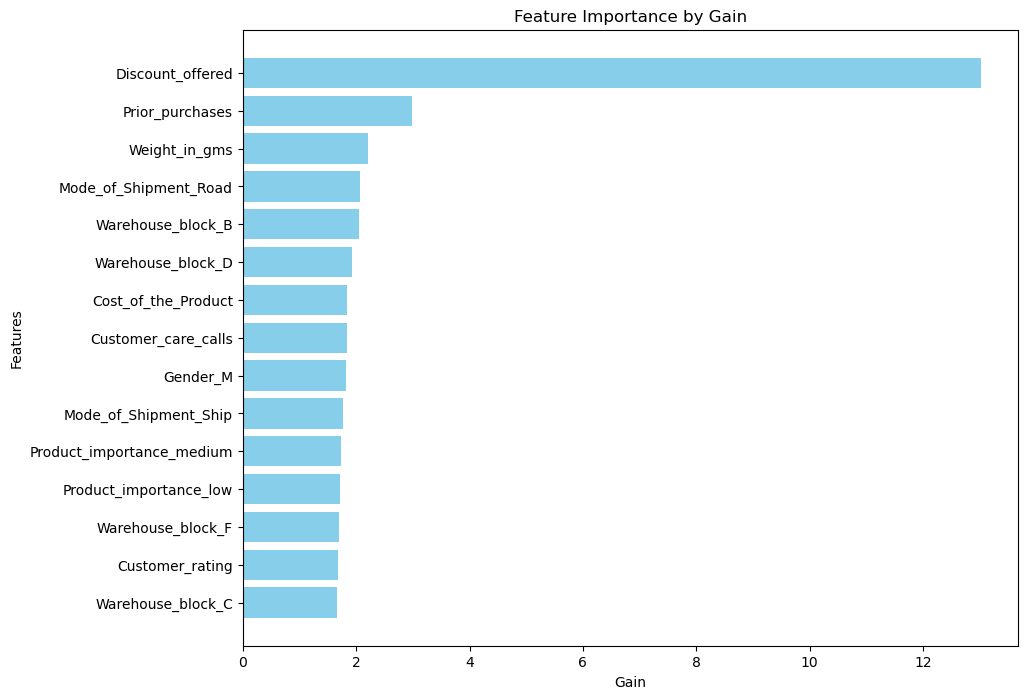

In [21]:
import matplotlib.pyplot as plt

# Extract feature importance (Gain)
importance = xgb_model.get_booster().get_score(importance_type='gain')

# Convert to a sorted list of features
sorted_importance = sorted(importance.items(), key=lambda item: item[1], reverse=True)

for feature, gain in sorted_importance:
    print(f"Feature: {feature}, Gain: {gain}")
    
features = [item[0] for item in sorted_importance]
gains = [item[1] for item in sorted_importance]

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(features, gains, color='skyblue')
plt.xlabel('Gain')
plt.ylabel('Features')
plt.title('Feature Importance by Gain')
plt.gca().invert_yaxis()
plt.show()


## Step 5: Hyperparameter Tuning: Optimize the model using cross-validation.
Used Randomized Search with Cross-Validation instaed of Grid Search with Cross-Validation due to time its taking to compute
 



In [44]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import numpy as np

# Parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'min_child_weight': [1, 3, 5, 7],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1]
}

# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring='accuracy',  # Metric to evaluate the model
    n_jobs=-1,  # Use all available cores
    cv=3,  # 3-fold cross-validation
    verbose=1,
    random_state=42
)

# Fit the random search model
random_search.fit(X_train, y_train)

# Best parameters found by the random search
best_params = random_search.best_params_
best_score = random_search.best_score_

best_params, best_score


Fitting 3 folds for each of 50 candidates, totalling 150 fits


({'subsample': 0.8,
  'reg_lambda': 1,
  'reg_alpha': 1,
  'n_estimators': 200,
  'min_child_weight': 5,
  'max_depth': 4,
  'learning_rate': 0.01,
  'gamma': 0.3,
  'colsample_bytree': 0.9},
 0.6791778719509153)

In [45]:
results = pd.DataFrame(random_search.cv_results_)
results.sort_values('mean_test_score',inplace=True,ascending= False)
results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_reg_lambda,param_reg_alpha,param_n_estimators,param_min_child_weight,param_max_depth,param_learning_rate,param_gamma,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
43,0.351327,0.163165,0.088559,0.081401,0.8,1,1,200,5,4,0.01,0.3,0.9,"{'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha...",0.688742,0.668745,0.680047,0.679178,0.008187,1
6,0.356051,0.001774,0.023135,0.008012,0.6,0,0.1,300,5,5,0.01,0.1,0.8,"{'subsample': 0.6, 'reg_lambda': 0, 'reg_alpha...",0.678613,0.667186,0.676150,0.673983,0.004910,2
3,0.112662,0.005494,0.016692,0.001744,1.0,0.5,0,100,1,5,0.05,0.1,1.0,"{'subsample': 1.0, 'reg_lambda': 0.5, 'reg_alp...",0.680561,0.661341,0.671863,0.671255,0.007858,3
22,0.119823,0.011447,0.014268,0.001942,0.8,1,0,100,7,5,0.05,0.4,0.9,"{'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha...",0.680561,0.666017,0.664069,0.670216,0.007358,4
11,0.109541,0.012585,0.010401,0.007355,1.0,0.5,1,100,1,6,0.05,0.2,0.9,"{'subsample': 1.0, 'reg_lambda': 0.5, 'reg_alp...",0.676276,0.656664,0.674201,0.669047,0.008797,5
21,0.175492,0.002126,0.015761,0.003518,1.0,0.1,0.1,400,3,4,0.3,0.5,0.6,"{'subsample': 1.0, 'reg_lambda': 0.1, 'reg_alp...",0.670432,0.656664,0.677708,0.668268,0.008727,6
27,0.264298,0.016157,0.023501,0.010961,1.0,1,0.5,500,3,6,0.05,0.3,0.6,"{'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha...",0.673938,0.664458,0.664458,0.667618,0.004469,7
14,0.583473,0.010461,0.049982,0.002783,0.7,0.5,1,400,7,7,0.01,0.4,0.9,"{'subsample': 0.7, 'reg_lambda': 0.5, 'reg_alp...",0.674328,0.659002,0.664458,0.665930,0.006343,8
23,0.302547,0.014745,0.031250,0.000001,0.9,0,1,200,7,7,0.01,0.2,0.8,"{'subsample': 0.9, 'reg_lambda': 0, 'reg_alpha...",0.672380,0.659782,0.661730,0.664631,0.005537,9
49,1.060787,0.295339,0.036465,0.029393,1.0,1,1,300,3,7,0.3,0.3,0.7,"{'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha...",0.669264,0.663289,0.652377,0.661643,0.006991,10


In [46]:
# Train the final model with the best parameters
final_model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
final_model.fit(X_train, y_train)

# Evaluate on the test set
y_pred = final_model.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)


print("confussion matrix",conf_matrix)
print("\n")
print("Accuracy of XGBoost:",acc_score*100,'\n')
print(class_report)
 


confussion matrix [[1196  116]
 [ 940 1048]]


Accuracy of XGBoost: 68.0 

              precision    recall  f1-score   support

           0       0.56      0.91      0.69      1312
           1       0.90      0.53      0.66      1988

    accuracy                           0.68      3300
   macro avg       0.73      0.72      0.68      3300
weighted avg       0.77      0.68      0.68      3300



Feature: Discount_offered, Gain: 310.65020751953125
Feature: Prior_purchases, Gain: 35.14389419555664
Feature: Weight_in_gms, Gain: 20.463594436645508
Feature: Cost_of_the_Product, Gain: 9.527382850646973
Feature: Customer_care_calls, Gain: 4.536993503570557
Feature: Mode_of_Shipment_Road, Gain: 4.258652687072754
Feature: Customer_rating, Gain: 3.9654271602630615
Feature: Gender_M, Gain: 3.6427862644195557
Feature: Warehouse_block_F, Gain: 3.5874388217926025
Feature: Product_importance_medium, Gain: 3.5305228233337402
Feature: Warehouse_block_D, Gain: 3.316833019256592
Feature: Warehouse_block_C, Gain: 3.2276604175567627
Feature: Product_importance_low, Gain: 3.1273391246795654
Feature: Warehouse_block_B, Gain: 2.7809371948242188
Feature: Mode_of_Shipment_Ship, Gain: 2.714292287826538


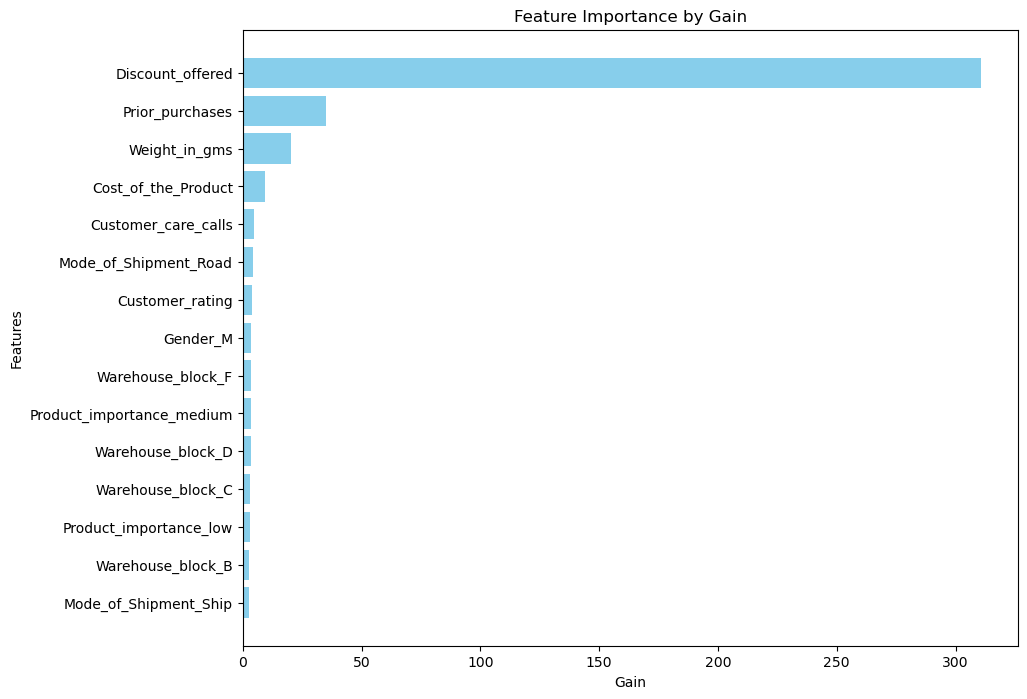

In [47]:
# Extract feature importance (Gain)
importance = final_model.get_booster().get_score(importance_type='gain')

# Sort the features by gain
sorted_importance = sorted(importance.items(), key=lambda item: item[1], reverse=True)


for feature, gain in sorted_importance:
    print(f"Feature: {feature}, Gain: {gain}")
    

features = [item[0] for item in sorted_importance]
gains = [item[1] for item in sorted_importance]

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(features, gains, color='skyblue')
plt.xlabel('Gain')
plt.ylabel('Features')
plt.title('Feature Importance by Gain')
plt.gca().invert_yaxis()
plt.show()


## Step 6: Precison Recall analysis
### Precision = TP / (TP + FP)
### Precision indicates the proportion of positive predictions that were actually correct.
### for something like prediciton - class 0  class 1 # default threshold: 0.5 
### 0.4 -  increase the chance of getting Delayed - increae chance of false postives
### Recall = TP / (TP + FN)
### Recall indicates the proportion of actual positive instances that were correctly identified by the model.

Precision: 0.9003436426116839
Recall: 0.5271629778672032
              precision    recall  f1-score   support

           0       0.56      0.91      0.69      1312
           1       0.90      0.53      0.66      1988

    accuracy                           0.68      3300
   macro avg       0.73      0.72      0.68      3300
weighted avg       0.77      0.68      0.68      3300



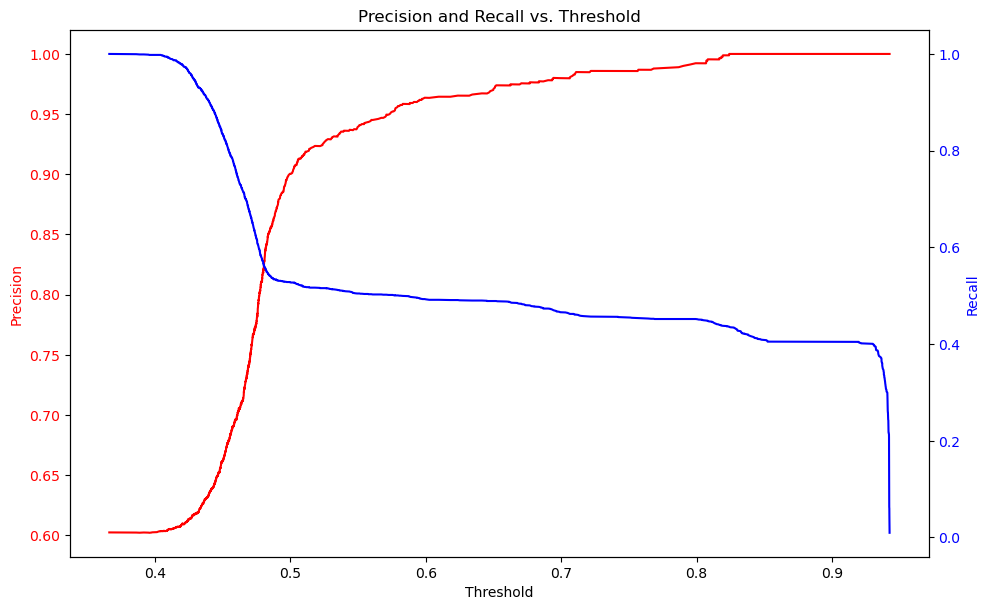

In [48]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve


# Make predictions on the test set
y_pred = final_model.predict(X_test)
y_pred_prob = final_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

# Calculate Precision and Recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Detailed classification report
print(classification_report(y_test, y_pred))

# Precision-Recall Curve
precision_values, recall_values, thresholds = precision_recall_curve(y_test, y_pred_prob)

import numpy as np
# Plot precision and recall on separate y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Threshold')
ax1.set_ylabel('Precision', color='red')
ax1.plot(thresholds, precision_values[:-1], color='red', label='Precision')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.set_ylabel('Recall', color='blue')
ax2.plot(thresholds, recall_values[:-1], color='blue', label='Recall')
ax2.tick_params(axis='y', labelcolor='blue')


fig.tight_layout()
plt.title('Precision and Recall vs. Threshold')
plt.show()

### FPR (False Positive Rate) vs. TPR (True Positive Rate) curve, commonly known as the ROC (Receiver Operating Characteristic) Curve,
### applicable for any binary classfication model 

#FPR = FP / (FP + TN)
#It measures the proportion of actual negative instances that are incorrectly predicted as positive.

#TPR = TP / (TP + FN)
#It measures the proportion of actual positive instances that are correctly predicted as positive.
#A higher AUC indicates better model performance.

AUC: 0.7472817085439466


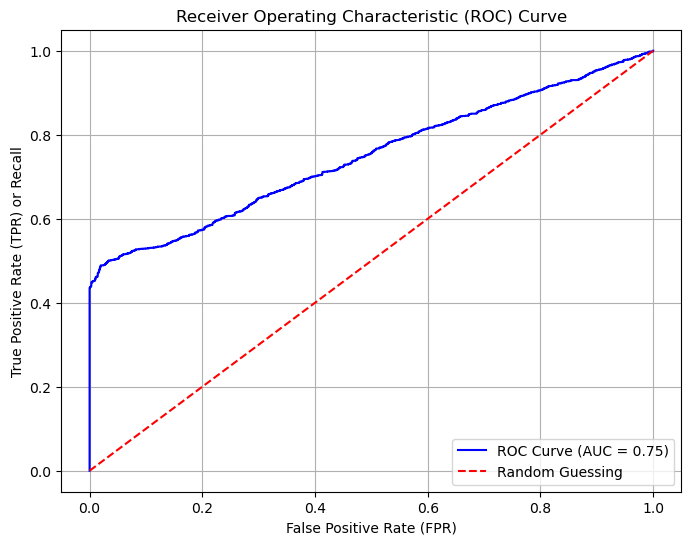

In [49]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for the positive class
y_pred_prob = final_model.predict_proba(X_test)[:, 1]

# Calculate FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC: {auc}")

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')  # Diagonal line (Random Guess)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) or Recall')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
